## PREDICTING UNEMPLOYMENT RATES IN AFRICA
### Dataset: World Educational Data (Kaggle)
### Target: Unemployment_Rate

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

### 1. LOAD AND FILTER DATA

In [75]:
df = pd.read_csv("Global_Education.csv", encoding="latin1")
df.tail()

,Countries and areas,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,...,Primary_End_Proficiency_Reading,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate
197,Venezuela,6.423750,66.589730,14,14,10,10,15,13,28,...,0,0,0,0,0,0,17.88,97.2,79.3,8.80
198,Vietnam,14.058324,108.277199,0,0,0,0,0,0,0,...,55,51,86,81,98,98,16.75,110.6,28.5,2.01
199,Yemen,15.552727,48.516388,96,96,10,21,23,34,46,...,0,0,0,0,0,0,30.45,93.6,10.2,12.91
200,Zambia,13.133897,27.849332,0,0,17,13,0,0,0,...,0,0,5,2,93,92,36.19,98.7,4.1,11.43
201,Zimbabwe,19.015438,29.154857,60,58,0,0,0,0,45,...,0,0,0,0,0,0,30.68,109.9,10.0,4.95


In [59]:

african_countries = [
    'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
    'Cape Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
    'Congo', 'Republic of the Congo', 'Ivory Coast', 'Democratic Republic of the Congo',
    'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia',
    'Gabon', 'Ghana', 'Guinea', 'Kenya', 'Lesotho', 'Liberia', 'Libya',
    'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco',
    'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Senegal',
    'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan',
    'Sudan', 'Togo', 'Tunisia', 'Uganda', 'Tanzania', 'Zambia', 'Zimbabwe'
]

df_africa = df[df['Countries and areas'].isin(african_countries)].copy()
print(f"Dataset Shape: {df_africa.shape}")

Dataset Shape: (51, 29)


### 2. DATA VISUALIZATION

In [60]:
# Features for analysis
feature_cols = [
    'Completion_Rate_Upper_Secondary_Male',
    'Completion_Rate_Upper_Secondary_Female', 
    'Gross_Tertiary_Education_Enrollment',
    'Youth_15_24_Literacy_Rate_Male',
    'Youth_15_24_Literacy_Rate_Female',
    'Birth_Rate',
    'Unemployment_Rate'
]

df_selected = df_africa[feature_cols]

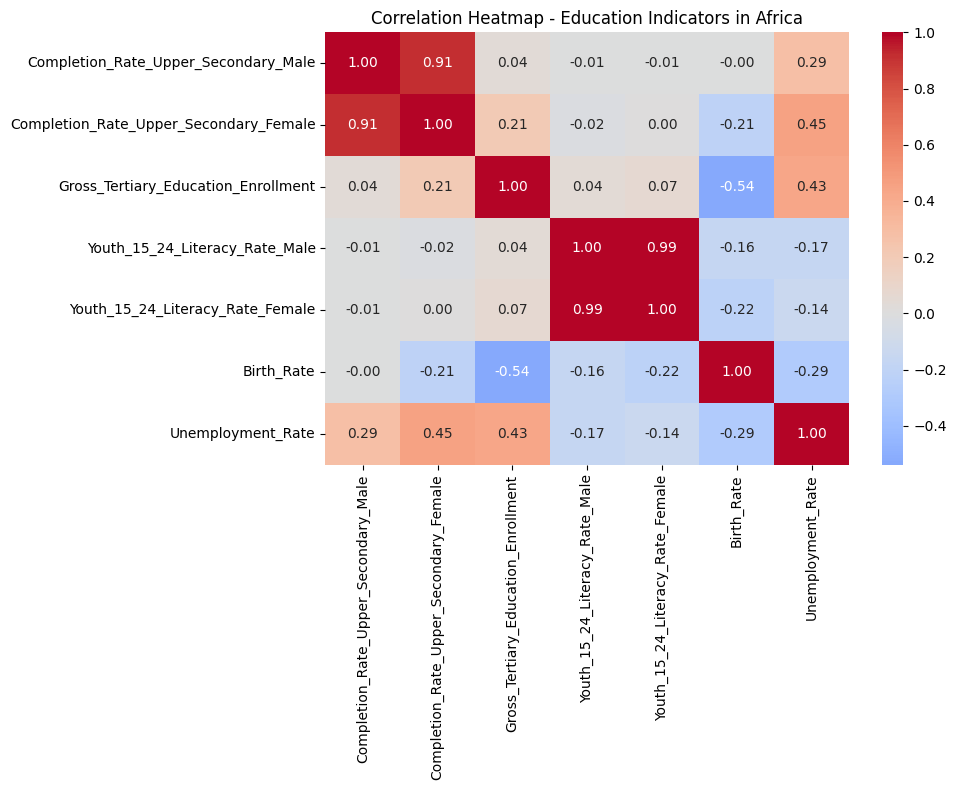

In [61]:
# FIGURE 1: Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_selected.corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap - Education Indicators in Africa')
plt.tight_layout()
plt.show()

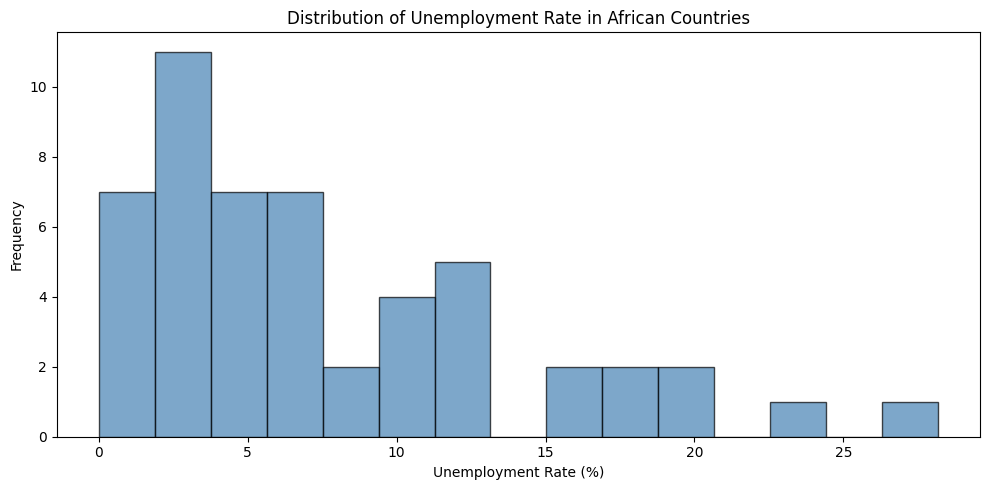

In [62]:
# FIGURE 2: Distribution of Target Variable
plt.figure(figsize=(10, 5))
plt.hist(df_africa['Unemployment_Rate'], bins=15, edgecolor='black', alpha=0.7, color='steelblue')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Unemployment Rate in African Countries')
plt.tight_layout()
plt.show()

### 3. FEATURE ENGINEERING

In [63]:
# Selected 6 features - dropped Country, Latitude, Longitude (not useful)
# All data is already numeric - no conversion needed

X = df_africa[[
    'Completion_Rate_Upper_Secondary_Male',
    'Completion_Rate_Upper_Secondary_Female',
    'Gross_Tertiary_Education_Enrollment',
    'Youth_15_24_Literacy_Rate_Male',
    'Youth_15_24_Literacy_Rate_Female',
    'Birth_Rate'
]]
y = df_africa['Unemployment_Rate']

print(f"Features: {list(X.columns)}")

Features: ['Completion_Rate_Upper_Secondary_Male', 'Completion_Rate_Upper_Secondary_Female', 'Gross_Tertiary_Education_Enrollment', 'Youth_15_24_Literacy_Rate_Male', 'Youth_15_24_Literacy_Rate_Female', 'Birth_Rate']


### 4. TRAIN-TEST SPLIT & STANDARDIZATION

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training samples: {X_train_scaled.shape[0]}")
print(f"Test samples: {X_test_scaled.shape[0]}")

Training samples: 40
Test samples: 11


### 5. MODEL TRAINING

In [65]:
# Model 1: Linear Regression with Gradient Descent (SGDRegressor)
lr_model = SGDRegressor(max_iter=1000, tol=1e-3, eta0=0.01, random_state=42)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

In [66]:
# Model 2: Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)
dt_pred = dt_model.predict(X_test_scaled)

In [67]:
# Model 3: Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)

### 6. MODEL EVALUATION

In [68]:
print("\nMODEL PERFORMANCE:")

models = {
    'Linear Regression (SGD)': (lr_model, lr_pred),
    'Decision Tree': (dt_model, dt_pred),
    'Random Forest': (rf_model, rf_pred)
}

results = {}
for name, (model, pred) in models.items():
    mse = mean_squared_error(y_test, pred)
    results[name] = {'model': model, 'mse': mse}
    print(f"{name} - MSE: {mse:.4f}")


MODEL PERFORMANCE:
Linear Regression (SGD) - MSE: 26.8429
Decision Tree - MSE: 62.9176
Random Forest - MSE: 41.7085


### 7. LOSS CURVE (Train vs Test)

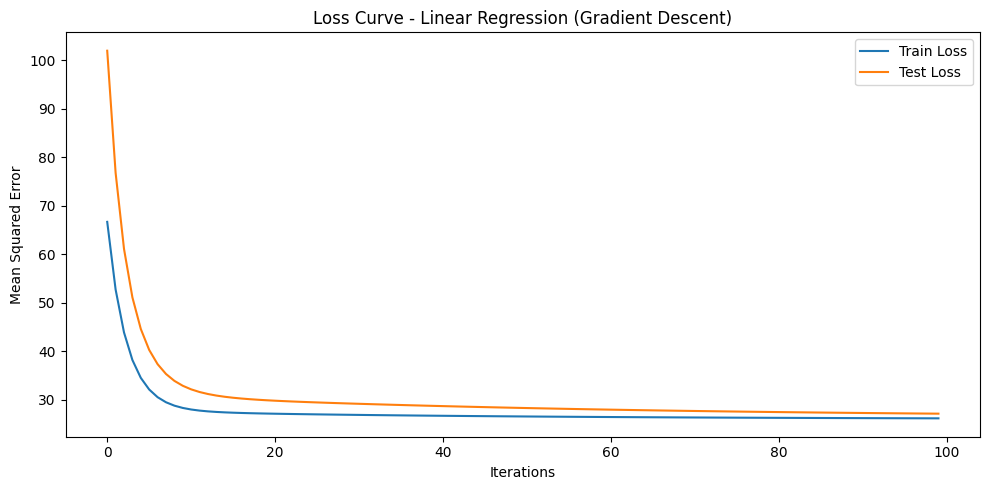

In [69]:
train_losses = []
test_losses = []

lr_temp = SGDRegressor(max_iter=1, tol=None, eta0=0.01, warm_start=True, random_state=42)

for i in range(100):
    lr_temp.fit(X_train_scaled, y_train)
    train_losses.append(mean_squared_error(y_train, lr_temp.predict(X_train_scaled)))
    test_losses.append(mean_squared_error(y_test, lr_temp.predict(X_test_scaled)))

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Loss Curve - Linear Regression (Gradient Descent)')
plt.legend()
plt.tight_layout()
plt.show()


### 8. SCATTER PLOT - BEFORE AND AFTER

In [70]:
plt.figure(figsize=(14, 5))

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

Text(0.5, 1.0, 'Before: Actual Data')

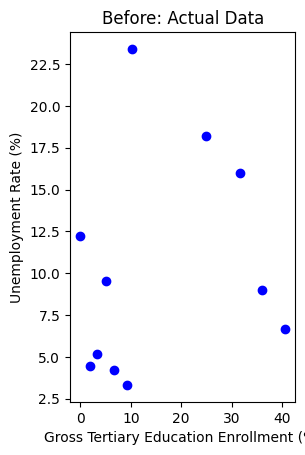

In [71]:
# Before
plt.subplot(1, 2, 1)
plt.scatter(X_test['Gross_Tertiary_Education_Enrollment'], y_test, color='blue')
plt.xlabel('Gross Tertiary Education Enrollment (%)')
plt.ylabel('Unemployment Rate (%)')
plt.title('Before: Actual Data')

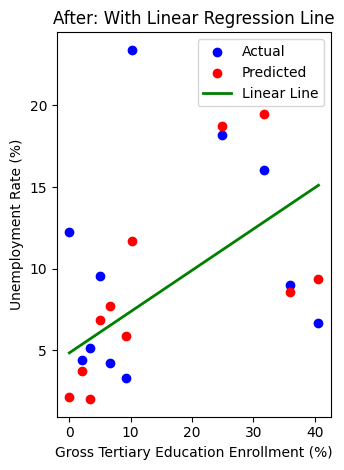

In [72]:
# After with regression line
plt.subplot(1, 2, 2)
plt.scatter(X_test['Gross_Tertiary_Education_Enrollment'], y_test, color='blue', label='Actual')
plt.scatter(X_test['Gross_Tertiary_Education_Enrollment'], lr_pred, color='red', label='Predicted')
z = np.polyfit(X_test['Gross_Tertiary_Education_Enrollment'], lr_pred, 1)
p = np.poly1d(z)
x_line = np.linspace(X_test['Gross_Tertiary_Education_Enrollment'].min(), 
                     X_test['Gross_Tertiary_Education_Enrollment'].max(), 100)
plt.plot(x_line, p(x_line), color='green', linewidth=2, label='Linear Line')
plt.xlabel('Gross Tertiary Education Enrollment (%)')
plt.ylabel('Unemployment Rate (%)')
plt.title('After: With Linear Regression Line')
plt.legend()

plt.tight_layout()
plt.show()

### 9. SAVE BEST MODEL

In [73]:
best_name = min(results, key=lambda k: results[k]['mse'])
best_model = results[best_name]['model']

print(f"\nBest Model: {best_name} (MSE: {results[best_name]['mse']:.4f})")

joblib.dump(best_model, 'best_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("Model saved as 'best_model.pkl'")


Best Model: Linear Regression (SGD) (MSE: 26.8429)
Model saved as 'best_model.pkl'


### 10. PREDICTION ON ONE TEST ROW

In [ ]:
sample = X_test.iloc[0:1]
sample_scaled = scaler.transform(sample)
actual = y_test.iloc[0]
predicted = best_model.predict(sample_scaled)[0]

print(f"\nSample Prediction:")
print(f"Actual: {actual:.2f}%")
print(f"Predicted: {predicted:.2f}%")